<IPython.core.display.Javascript object>


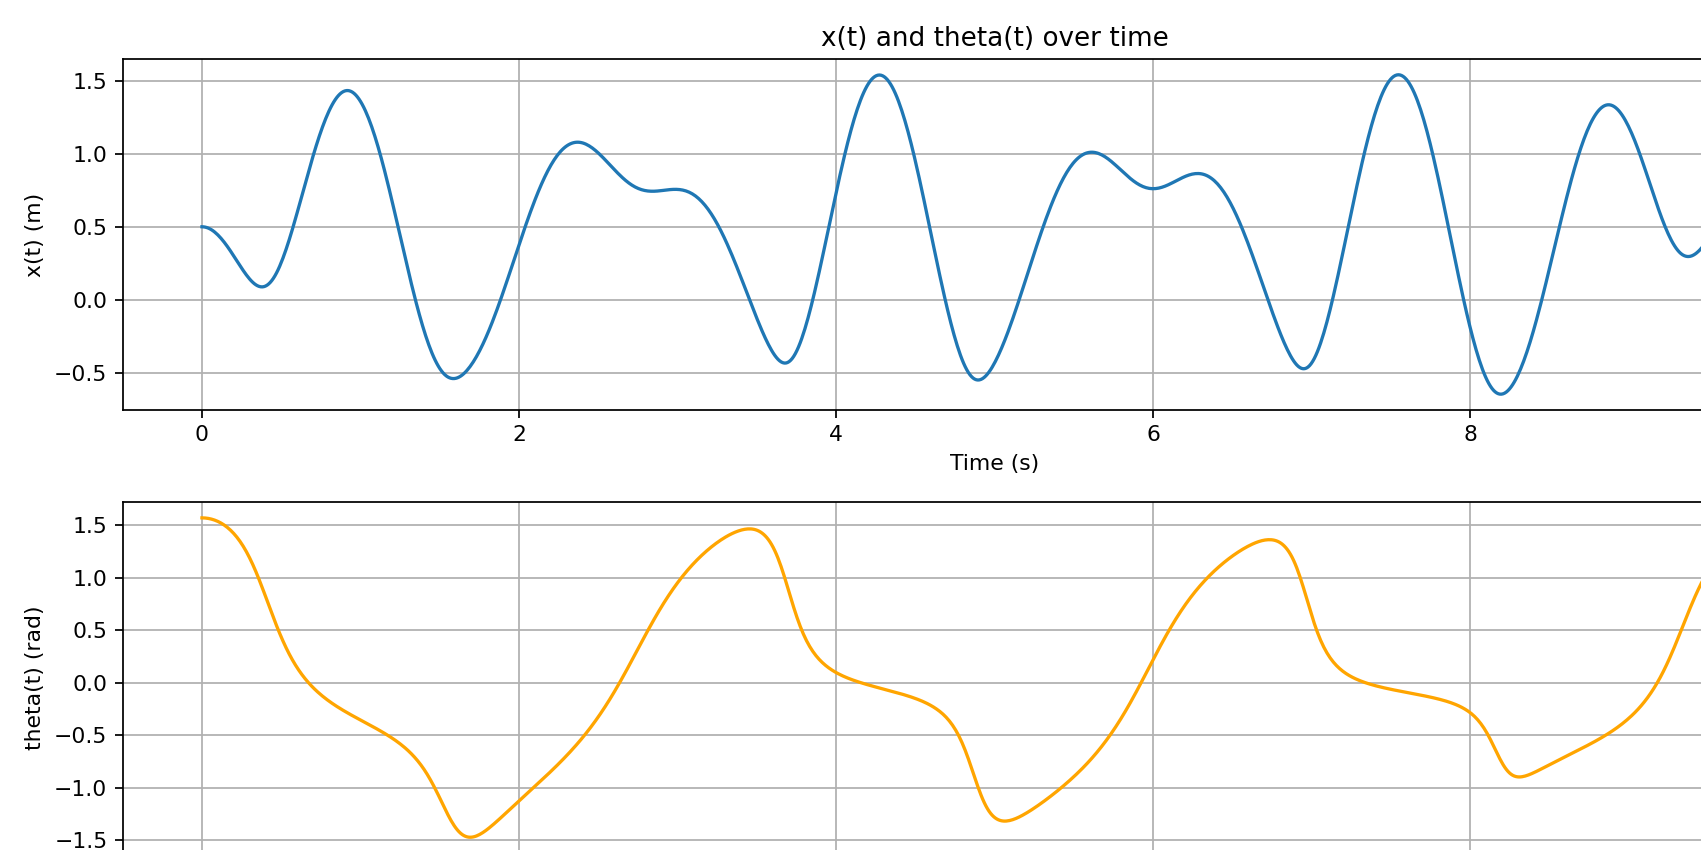

okay


In [4]:
%matplotlib notebook
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
m = 1       # mass (kg)
k = 23      # spring constant (N/m)
g = 9.81    # gravity (m/s^2)
l = 1       # length of the pendulum (m)

# Define the system of ODEs
def system(t, y):
    x1, x2, theta1, theta2 = y
    # Equations for x'' and theta''
    x1_prime = x2
    x2_prime = (m * g * np.cos(theta1) - k * x1 + m * (l + x1) * theta2**2) / m
    theta1_prime = theta2
    theta2_prime = (-2 * x2 * theta2 - g * np.sin(theta1)) / (l + x1)
    
    return [x1_prime, x2_prime, theta1_prime, theta2_prime]

# Initial conditions: [x(0), x'(0), theta(0), theta'(0)]
y0 = [0.5, 0, np.pi/2, 0]  # Since x''(0) = 0 and theta''(0) = 0, both are zero initially

# Time range for the solution
t_span = (0, 10)  # Solve from t=0 to t=10 seconds
t_eval = np.linspace(0, 10, 1000)  # Evaluate the solution at 1000 points

# Solve the system of ODEs
solution = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')

# Extract the solution for x(t) and theta(t)
x_sol = solution.y[0]
theta_sol = solution.y[2]
t_sol = solution.t

# Plotting the results
plt.figure(figsize=(12, 6))
if len(x_sol)==len(theta_sol)==len(t_eval):
    print("okay")
# Plot x(t)
plt.subplot(2, 1, 1)
plt.plot(t_sol, x_sol, label='x(t)')
plt.title('x(t) and theta(t) over time')
plt.xlabel('Time (s)')
plt.ylabel('x(t) (m)')
plt.grid(True)

# Plot theta(t)
plt.subplot(2, 1, 2)
plt.plot(t_sol, theta_sol, label='theta(t)', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('theta(t) (rad)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Spring pendulum simulation as gif code

0 / 200
1 / 200
2 / 200
3 / 200
4 / 200
5 / 200
6 / 200
7 / 200
8 / 200
9 / 200
10 / 200
11 / 200
12 / 200
13 / 200
14 / 200
15 / 200
16 / 200
17 / 200
18 / 200
19 / 200
20 / 200
21 / 200
22 / 200
23 / 200
24 / 200
25 / 200
26 / 200
27 / 200
28 / 200
29 / 200
30 / 200
31 / 200
32 / 200
33 / 200
34 / 200
35 / 200
36 / 200
37 / 200
38 / 200
39 / 200
40 / 200
41 / 200
42 / 200
43 / 200
44 / 200
45 / 200
46 / 200
47 / 200
48 / 200
49 / 200
50 / 200
51 / 200
52 / 200
53 / 200
54 / 200
55 / 200
56 / 200
57 / 200
58 / 200
59 / 200
60 / 200
61 / 200
62 / 200
63 / 200
64 / 200
65 / 200
66 / 200
67 / 200
68 / 200
69 / 200
70 / 200
71 / 200
72 / 200
73 / 200
74 / 200
75 / 200
76 / 200
77 / 200
78 / 200
79 / 200
80 / 200
81 / 200
82 / 200
83 / 200
84 / 200
85 / 200
86 / 200
87 / 200
88 / 200
89 / 200
90 / 200
91 / 200
92 / 200
93 / 200
94 / 200
95 / 200
96 / 200
97 / 200
98 / 200
99 / 200
100 / 200
101 / 200
102 / 200
103 / 200
104 / 200
105 / 200
106 / 200
107 / 200
108 / 200
109 / 200
110 / 200


GIF saved as spring_pendulum_simulation.gif


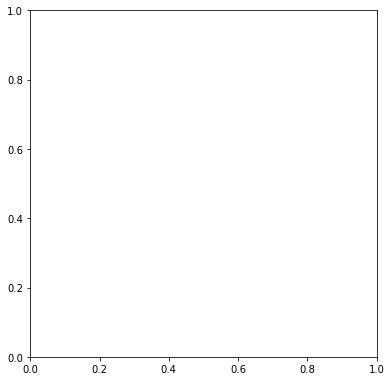

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 31 17:30:22 2024

@author: kotil
"""

import os
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from moviepy.video.io.ImageSequenceClip import ImageSequenceClip

# Ensure the 'frames' directory exists
output_dir = "frames"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Pendulum equilibrium spring length (m), spring constant (N.m)
L0, k = 3, 40
m = 2
# The gravitational acceleration (m.s-2).
g = 9.81

def deriv(y, t, L0, k, m):
    """Return the first derivatives of y = theta, z1, L, z2."""
    theta, z1, L, z2 = y

    thetadot = z1
    z1dot = (-g*np.sin(theta) - 2*z1*z2) / L
    Ldot = z2
    z2dot = (m*L*z1**2 - k*(L-L0) + m*g*np.cos(theta)) / m
    return thetadot, z1dot, Ldot, z2dot

# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 20, 0.01
t = np.arange(0, tmax+dt, dt)
# Initial conditions: theta, dtheta/dt, L, dL/dt
y0 = [np.pi/6, 0, L0, 0]

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(L0, k, m))
# Unpack z and theta as a function of time
theta, L = y[:,0], y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Plotted bob circle radius
r = 0.08
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 3
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

def plot_spring(x, y, theta, L):
    """Plot the spring from (0,0) to (x,y) as the projection of a helix."""
    # Spring turn radius, number of turns
    rs, ns = 0.05, 25
    # Number of data points for the helix
    Ns = 1000
    # We don't draw coils all the way to the end of the pendulum:
    # pad a bit from the anchor and from the bob by these number of points
    ipad1, ipad2 = 100, 150
    w = np.linspace(0, L, Ns)
    # Set up the helix along the x-axis ...
    xp = np.zeros(Ns)
    xp[ipad1:-ipad2] = rs * np.sin(2*np.pi * ns * w[ipad1:-ipad2] / L)
    # ... then rotate it to align with  the pendulum and plot.
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    xs, ys = - R @ np.vstack((xp, w))
    ax.plot(xs, ys, c='k', lw=2)

def make_plot(i):
    """
    Plot and save an image of the spring pendulum configuration for time
    point i.

    """

    plot_spring(x[i], y[i], theta[i], L[i])
    # Circles representing the anchor point of rod 1 and the bobs
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x[i], y[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x[imin:imax], y[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-np.max(L)-r, np.max(L)+r)
    ax.set_ylim(-np.max(L)-r, np.max(L)+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.savefig(os.path.join(output_dir, '_img{:04d}.png'.format(i//di)), dpi=72)
    # Clear the Axes ready for the next image.
    plt.cla()


# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
# This figure size (inches) and dpi give an image of 600x450 pixels.
fig = plt.figure(figsize=(8.33333333, 6.25), dpi=72)
ax = fig.add_subplot(111)

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i)

# Combine the images into a GIF
frame_files = [os.path.join(output_dir, f) for f in sorted(os.listdir(output_dir)) if f.endswith('.png')]
gif_output = "spring_pendulum_simulation.gif"
clip = ImageSequenceClip(frame_files, fps=fps)
clip.write_gif(gif_output)

print(f"GIF saved as {gif_output}")
